In [37]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
file1 = "city_data.csv"
file2 = "ride_data.csv"
rawcity_df = pd.read_csv(file1)
rawcity_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [39]:
rawride_df = pd.read_csv(file2)
rawride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [55]:
rawcomb_df = pd.merge(rawcity_df, rawride_df, on =["city"])
rawcomb_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [59]:
grouped = rawcomb_df.groupby("city")
grouped.count().head()


,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19


In [42]:

# Bubble Plot Calculation
AverageFare = grouped["fare"].mean()
TotalRides = grouped["ride_id"].count()
drivercount = grouped["driver_count"].sum()
#this operator // divides to the closest round number
TotalDriver = (drivercount // TotalRides)

Types = rawcity_df.groupby("type")

Scatt = pd.DataFrame({"AverageFare": AverageFare,
                        "TotalRides": TotalRides,
                        "TotalDrivers": TotalDriver})

Scatt["AverageFare"] = Scatt["AverageFare"].round(2)
Scatt.head()

,AverageFare,TotalDrivers,TotalRides
city,,,
Alvarezhaven,23.93,21,31
Alyssaberg,20.61,67,26
Anitamouth,37.32,16,9
Antoniomouth,23.62,21,22
Aprilchester,21.98,49,19


In [43]:
# Makes a new dataframe based on Type
Urban = rawcomb_df.loc[rawcomb_df["type"] == "Urban", :]
Sub = rawcomb_df.loc[rawcomb_df["type"] == "Suburban", :]
Rural = rawcomb_df.loc[rawcomb_df["type"] == "Rural"]

# Groups new dataframe by city name
GUrban = Urban.groupby("city")
GSub = Sub.groupby("city")
GRural = Rural.groupby("city")

# Bubble Calculation
AverageFare = grouped["fare"].mean()
TotalRides = grouped["ride_id"].count()
drivercount = grouped["driver_count"].sum()
TotalDriver = (drivercount // TotalRides)

# Urban Data Manipulation
UFare = GUrban["fare"].mean()
URides = GUrban["ride_id"].count()
Ucount = GUrban["driver_count"].sum()
UDriver = (Ucount // URides)

# Suburban Data Manipulation
SFare = GSub["fare"].mean()
SRides = GSub["ride_id"].count()
Scount = GSub["driver_count"].sum()
SDriver = (Scount // SRides)

# Rural Data Manipulation
RFare = GRural["fare"].mean()
RRides = GRural["ride_id"].count()
Rcount = GRural["driver_count"].sum()
RDriver = (Rcount // RRides)

In [44]:
# Make new DFs for plotting
FUrban = pd.DataFrame({"AverageFare": UFare,
                       "TotalRides": URides,
                       "TotalDrivers": UDriver})
FUrban["AverageFare"] = FUrban["AverageFare"].round(2)

FSub = pd.DataFrame({"AverageFare": SFare,
                     "TotalRides": SRides,
                     "TotalDrivers": SDriver})
FSub["AverageFare"] = FSub["AverageFare"].round(2)

FRural = pd.DataFrame({"AverageFare": RFare,
                       "TotalRides": RRides,
                       "TotalDrivers": RDriver})
FRural["AverageFare"] = FRural["AverageFare"].round(2)

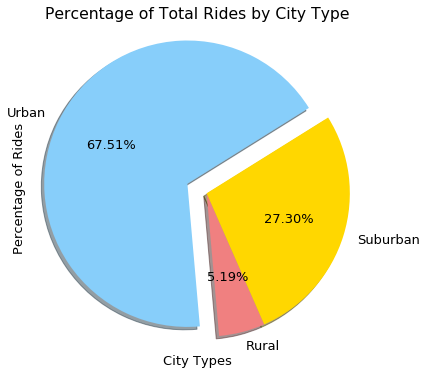

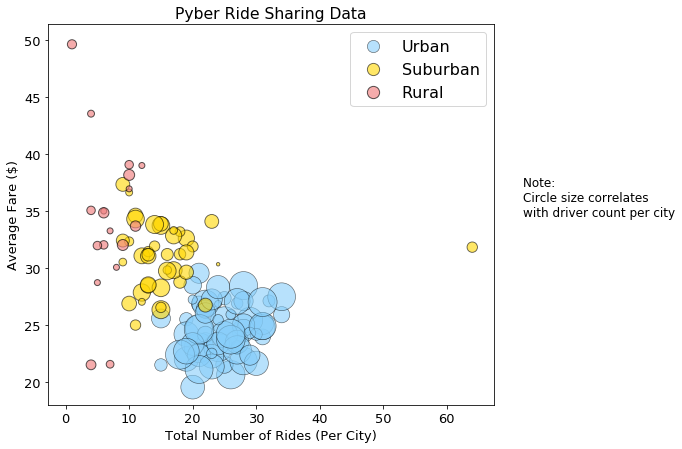

In [45]:
# Bubble Plot
ChangeBubbleSize = 12
CBS = ChangeBubbleSize
plt.figure(figsize=(8,7))
BubUr = plt.scatter(FUrban.TotalRides, FUrban.AverageFare, c="lightskyblue", label = "Urban", 
                    s=(FUrban.TotalDrivers * CBS), alpha = 0.6, edgecolor = "black", linewidths = .6)

# Bubble Plot
BubSu = plt.scatter(FSub.TotalRides, FSub.AverageFare, c="gold", label = "Suburban", 
                    s=(FSub.TotalDrivers * CBS), alpha = 0.6, edgecolor = "black", linewidths = .9)

# Bubble Plot
BubRu = plt.scatter(FRural.TotalRides, FRural.AverageFare, c="lightcoral", label = "Rural", 
                    s=(FRural.TotalDrivers * CBS), alpha = 0.65, edgecolor = "black", linewidths = 1)

lgnd = plt.legend(handles=[BubUr, BubSu, BubRu], scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.figtext(.95, .5, "Note: \nCircle size correlates \nwith driver count per city", fontsize=12)

# To not display "outliers", uncomment these two lines below
#plt.xlim(2,40)
#plt.ylim(15,45)

#plt.savefig("Figures/Ride_Sharing_Data.png", bbox_inches = 'tight')
plt.show()

In [46]:
# Pie Charts Data
TypeGrouped = rawcomb_df.groupby("type")
TypeGrouped_Raw = rawcity_df.groupby("type")

# Pice Chart #1
FareTotal = rawcomb_df["fare"].sum()
GroupedFare = TypeGrouped["fare"].sum()

GFTotal = GroupedFare / FareTotal

# Pie Chart #2
RideTotal = rawcomb_df["ride_id"].count()
GroupedRide = TypeGrouped["ride_id"].count()

GRTotal = GroupedRide / RideTotal

# Pie Chart #3
DriverTotal = rawcity_df["driver_count"].sum()
GroupedDriver = TypeGrouped_Raw["driver_count"].sum()

GDTotal = GroupedDriver / DriverTotal

print(GFTotal)
print(GRTotal)
print(GDTotal)

type
Rural       0.065798
Suburban    0.314458
Urban       0.619745
Name: fare, dtype: float64
type
Rural       0.051932
Suburban    0.272954
Urban       0.675114
Name: ride_id, dtype: float64
type
Rural       0.031054
Suburban    0.190505
Urban       0.778441
Name: driver_count, dtype: float64


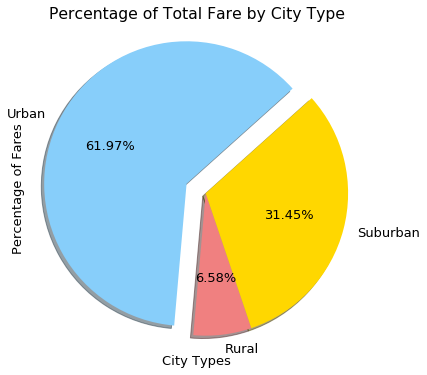

In [47]:

# Pie Chart #1: Total Fare
explode = (0, 0, 0.15)
labels = GFTotal.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(GFTotal, labels = labels, explode = explode, colors = colors, startangle = 265, shadow = True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Percentage of Total Fare by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Fares")
#plt.savefig("Figures/Total_Fares.png", bbox_inches = 'tight')
plt.show()

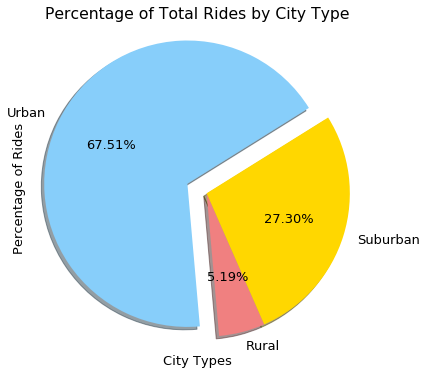

In [48]:
# Pie Chart #2: Total Rides
explode = (0, 0, 0.15)
labels = GRTotal.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(GRTotal, labels = labels, explode = explode, colors = colors, startangle = 275, shadow = True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Rides")
#plt.savefig("Figures/Total_Rides.png", bbox_inches = 'tight')
plt.show()

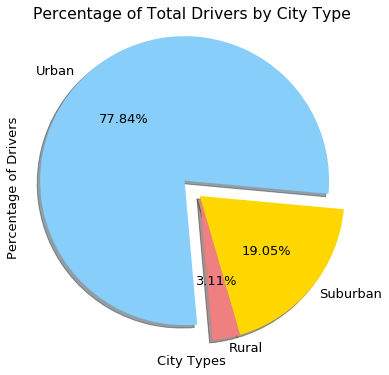

In [49]:
# Pie Chart #3: Total Drivers
explode = (0, 0, 0.15)
labels = GDTotal.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(GDTotal, labels = labels, explode = explode, colors = colors, startangle = 275, shadow = True, autopct="%1.2f%%", labeldistance=1.07)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Drivers")
#plt.savefig("Figures/Total_Drivers.png", bbox_inches = 'tight')
plt.show()